Autor: Daniel Fernando Beltran Huertas

## Punto 1

Se emplea el algoritmo de Horner para resolver el ejercicio.

In [109]:
horner <- function(coef, x){
  
  resultado <- coef[1]
  iteraciones <-0
  
  for(a in coef[2:length(coef)]){
    
      resultado <- x*resultado + a
      iteraciones <- iteraciones + 2
      
  }
  
  return(cat("El resultado es: ", resultado, "\nEl numero minimo de operaciones es: ", iteraciones,"\nSon ",iteraciones/2," multiplicaciones y ",iteraciones/2, " sumas"))
  
}

### 1.a Hallar P(x) en el valor indicado y el número mínimo de operaciones para realizarlo

$$ P(x) = 2x^4 -3x^2+3x-4,x_0=-2 $$

In [110]:
x0 <- -2
coef <- c(2,0,-3,3,-4)

horner(coef,x0)

El resultado es:  10 
El numero minimo de operaciones es:  8 
Son  4  multiplicaciones y  4  sumas

$$ P(x) = 7x^5 + 6x^4 - 6x^3 +3x-4,x_0=3 $$

In [111]:
x0 <- 3
coef <- c(7,6,-6,0,3,-4)

horner(coef,x0)

El resultado es:  2030 
El numero minimo de operaciones es:  10 
Son  5  multiplicaciones y  5  sumas

$$ P(x) = -5x^6 + 3x^4 +2x^2 -4x,x_0=-1 $$

In [112]:
x0 <- -1
coef <- c(-5,0,3,0,2,-4,0)

horner(coef,x0)

El resultado es:  4 
El numero minimo de operaciones es:  12 
Son  6  multiplicaciones y  6  sumas

### 1.b Demuestre que el numero mínimo de multiplicaciones es n siendo n el grado del polinomio

Demostración por inducción: 

Proposicion: Dado un polinomio P(x) de grado n y un punto x0, el minimo numero de multiplicaciones para evaluar P(x0) es n. 

#### Paso 1: Evaluar para n = 0

$$ Sea \;P(x) = a , tal que \; a \in\;\Re$$  

Evaluar

$$ P(x_0) = a $$ 

Requiere 0 multiplicaciones, por lo tanto se cumple para n=0.

#### Paso 2: Hipotesis de induccion

$$ Sea \;P(x) = c_nx^n + c_{n-1}x^{n-1} + ... + c_{1}x + c_0 \;un\; polinomio\;de\;grado\;n$$

El mininimo numero de multiplicaciones requeridas para evaluar P(x0) es n.

#### Paso 3: Demostrar para n+1

$$ Dado \;P(x) = c_{n+1}x^{n+1} + c_nx^n + c_{n-1}x^{n-1} + ... + c_{1}x + c_0 $$

Se aplica factor comun de x en P(x), resultando:

$$P(x) = x(c_{n+1}x^{n} + c_{n}x^{n-1} + c_{n-1}x^{n-2} + ... + c_{1}) + c_0 $$

Se observa que la expresion entre parentesis corresponde a un polinomio G(x) de grado n, es decir:

$$P(x) = xG(x) + c_0 $$

Se sabe por la hipotesis de induccion que el numero minimo de multiplicaciones para evaluar G(x0) es n. Por lo tanto:
$$P(x_0) = x_0G(x_0) + c_0 $$

Requiere como minimo n+1 multiplicaciones, con lo cual queda demostrada la proposicion para un polinomio de grado n+1.

## Punto 2

Dado el siguiente algoritmo: 

    Leer n 
    Mientras n>0 repita
        d <- mod(n,2)
        n <- fix(n/2)
        Mostrar d
    fin

A continuación se muestra el algoritmo implementado en R.

In [1]:
algoritmo <- function(n){

iteraciones <-0
vec <- n
d<-0

while(n > 0){
  
  d<- n %% 2
  n<-floor(n/2)
  
  iteraciones <- iteraciones + 1
  vec <- c(vec,d)
}

vec <<- vec
iteraciones <<- iteraciones

return (cat("Iteraciones: ",iteraciones))  
}

### 2.a) Recorra el algoritmo con n = 73

A continuación se ejecuta el algoritmo y se muestra el valor que toma n en cada iteración.

In [2]:
algoritmo(73)

tabla <- data.frame(cbind(Iteracion=1:iteraciones,Valor=vec[2:(iteraciones+1)]))
tabla

Iteraciones:  7

Iteracion,Valor
1,1
2,0
3,0
4,1
5,0
6,0
7,1


### 2.b) Obtener T(n) y expresarlo en notación O(n)

En donde T(n) corresponde a la cantidad de operaciones aritméticas de división que se realizan para resolver un problema de tamaño n.

#### Solución deductiva

Sea k el numero de veces que n puede ser dividido en 2 hasta llegar a 1, se obtiene la expresión. 
$$ \frac{n}{2^k} = 1 $$ 

Despejando k se obtiene:
$$ n = 2^k $$

$$ \log(n) = k\log_{10}(2) $$  

$$ k = \frac{\log_{10}(n)}{\log_{10}(2)} $$

$$ k = \lfloor\log_2(n)\rfloor\;divisiones$$

Observe que el algoritmo se repite mientras que n > 0, se sabe que n puede ser divido k veces hasta llegar a 1, por lo tanto el algoritmo realiza

$$T(n) = k + 1 = \lfloor\log_2(n)\rfloor\ + 1 \;divisiones$$ 

Finalmente, la respuesta expresada en notación O(n) es:

$$O(\log_2(n))$$

## Punto 3 Resolver con método de Newton

### Ejemplo: 
*Una partícula se mueve en el espacio con el vector de posición **R(t) = (2cos(t),sen(t),0).** Se requiere conocer el tiempo en el que el objeto se encuentra más cerca del punto **P(2,1,0).** Utilice el método de Newton con cuatro decimales de precisión.*

Para resolver el problema se desea hallar un valor t0 tal que la distancia entre R(t0) y P sea mínima, empleando la definición de distancia entre dos puntos se llega a la siguiente expresión:

$$ D(t) = \sqrt{ ( 2 - cos(t) )^2 + (1 - sin(t) )^2  } $$ 

Para encontrar los valores mínimos de D(t) se calcula la derivada:

$$ D´(t) = \frac{-cos(t) + 2 sin(t)}{ \sqrt{5 - 4 cos(t) + cos^2(t) - 2 sin(t) + sin^2(t)} }$$ 

Finalmente para encontrar los valores de t que cumplen D´(t)=0  se emplea el método de Newton-Raphson:

In [6]:
# Declaración de variables
E <- 0 # error
d <- expression( sqrt( ( 2 - 2*cos(t) )^2 + (1 - sin(t) )^2 ) ) # D(t)
f <- D(d,"t") # D´(t)
fprima <- D(f,"t") #D´´(t)

In [7]:
newtonR <- function(val){
  E <- 1
  error <- 1e-5
  x1<-0 
  vec <-0
  i <-0
    
  while(error < E){
    
    x1 <- val - eval(f, envir=list(t=val))/eval(fprima, envir=list(t=val))
    E <- abs(x1-val)/abs(x1)
    val <- x1
    
    vec<-c(vec,E) 
    i<- i+1
  }
  
  E <<- E
  vec <<- vec
  i<<-i
    
  return(val)
  
}

##### Resultado

In [83]:
cat ("El tiempo en el cual R(t) es mas cercano al punto P(2,1,0) es " , newtonR(0.4) , "\nCon un error: ", E) 

El tiempo en el cual R(t) es mas cercano al punto P(2,1,0) es  0.5872198 
Con un error:  7.580966e-06

## Punto 4 Encontrar intersección en coordenadas polares

In [8]:
##Código para grafica polar

polar <- function (theta, r, color){
  y <- 0
  x <- 0
  ejex <- 1
  
  for (i in 1:length(r)){
    if(is.nan(r[i])== T){
      r[i] <- 0
    }
  }
  
  angulo <- seq(-max(theta),max(theta),by=theta[2]-theta[1])
  y <- r*sin(theta)
  x <- r*cos(theta)

  aux <- max(r)
  # Dibuja los ejes.
  while (aux > 0){
    fi <- aux*sin(angulo)
    cir <- aux*cos(angulo)
    points(cir,fi,pch="-",col="gray",cex=0.3)
    text(ejex+0.2,-0.2,ejex,col="gray")
    ejex <- ejex + 1
    aux <- aux - 1
  }
  
  abline(v=((max(cir)+min(cir))/2),col="gray")
  abline(h=((max(cir)+min(cir))/2),col="gray")
  segments(-max(r)+0.5,-max(r)+0.5,max(r)-0.5,max(r)-0.5,col="gray")
  segments(-max(r)+0.5,max(r)-0.5,max(r)-0.5,-max(r)+0.5,col="gray")
  
  points(x,y,pch=20,col=color,cex=1)
  
}

graficarPuntoPolar <- function(angulo){
    r <- 2 + cos(3*angulo)
    y <- r*sin(angulo)
    x <- r*cos(angulo)
    points(x,y,pch=20,col=10,cex=1)
}

Para encontrar la interseccion de: 
$$r = 2 + \cos(3t),\;r=2-e^t$$
Se restan las dos ecuaciones, obteniendo:
$$ \cos(3t) + e^t = 0 $$ 

Para encontrar la solucion de la ecuacion se utiliza el metodo de Newton y el de Biseccion.

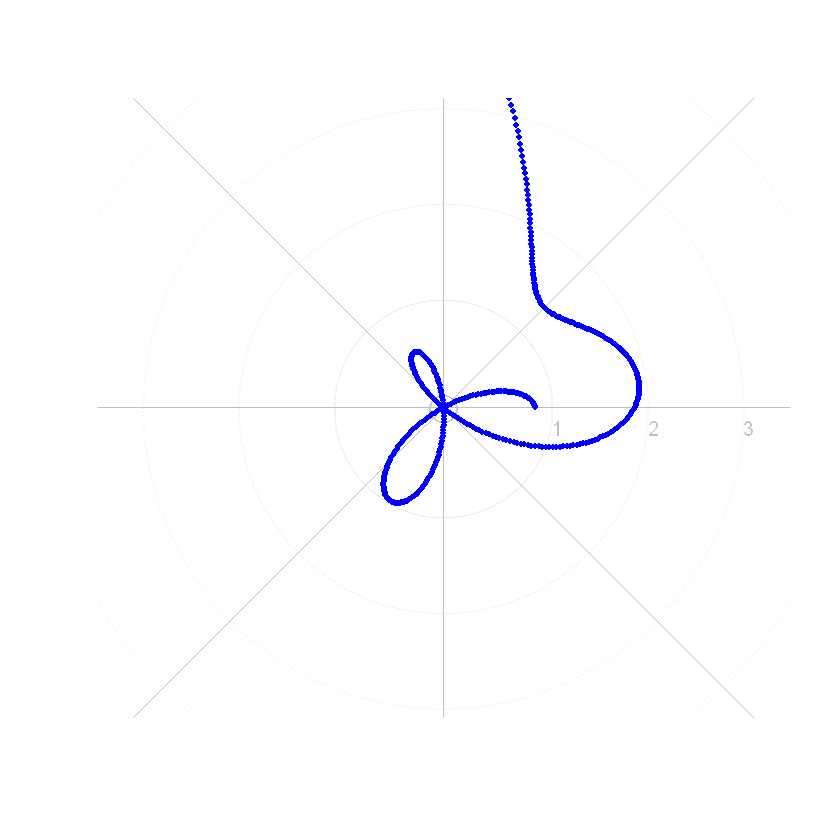

In [3]:
dim <- seq(-pi, pi, by=pi/300) 
r=cos(3*dim) + exp(dim)
plot.new()
plot.window(xlim = c(-3, 3), ylim = c(-3, 3), asp = 1)

polar(dim,r,"blue")

### 4.a Metodo de Newton

Se utiliza el codigo del punto anterior con:

$$ f(t) =  \cos(3t) + e^t $$

$$ f'(t) =  -3\sin(3t) - e^t $$

La solución por el método de Newton-Raphson es:  -0.6973291  i=  6 
Con error de E=  1.021408e-09

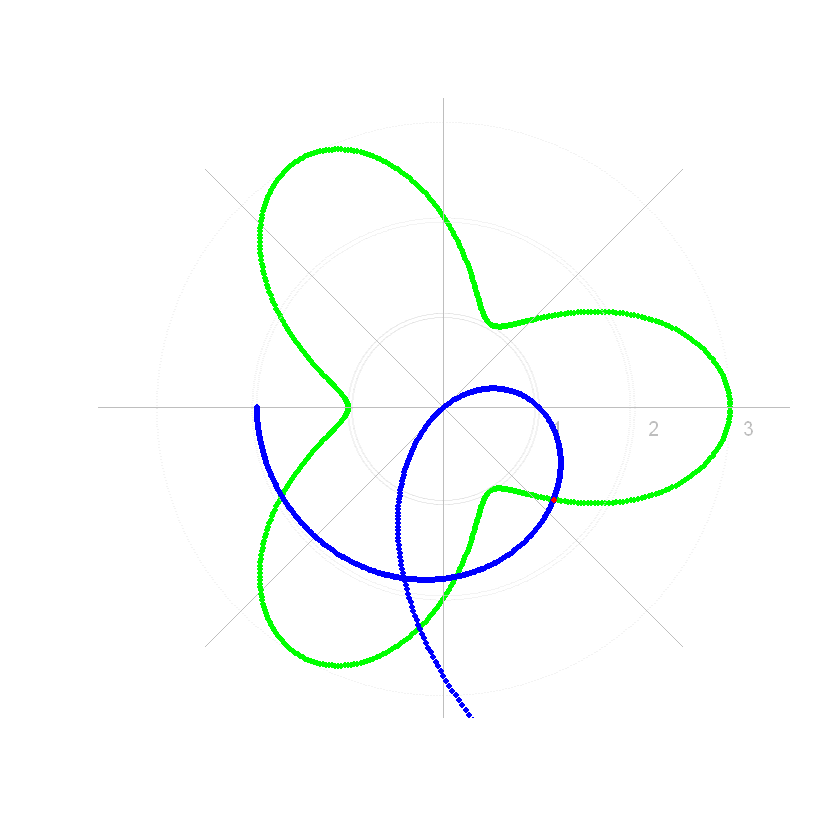

In [7]:
f <- expression( cos(3*t) + exp(t) ) #f(t)
fprima <- D(f,"t") #f'(t)
sol1 <- newtonR(0)
cat("La solución por el método de Newton-Raphson es: ",sol1," i= ", i, "\nCon error de E= ",E)

plot.new()
plot.window(xlim = c(-3, 3), ylim = c(-3, 3), asp = 1)

dim <- seq(-pi, pi, by=pi/300) 
r=2+cos(3*dim)
polar(dim,r,"green")

r=2-exp(dim)
polar(dim,r,"blue")

graficarPuntoPolar(sol1)

### 4.b Metodo de Biseccion

El codigo del metodo de biseccion es el siguiente

In [10]:
f <- function(t){
    return (cos(3*t) + exp(t))
}

In [13]:
biseccion <- function(a,b){
  E <- b-a
  error<- 1e-5
  x<-0
  iteraciones<-0
  vec <-0
  
  while (error < E){
    x<- (a+b)/2

    if(f(x)*f(a) < 0 )

      b = x

    if(f(x)*f(b) < 0)
      a = x
      
    E <- (b-a)/2
    vec<-c(vec,E)
    iteraciones<-iteraciones+1
  }
  vec<<-vec
  iteraciones <<- iteraciones
  E <<- E

  return(x)
}

La solución por el método de bisección es:  -1.495428  i=  17 
Con error de E=  5.992112e-06

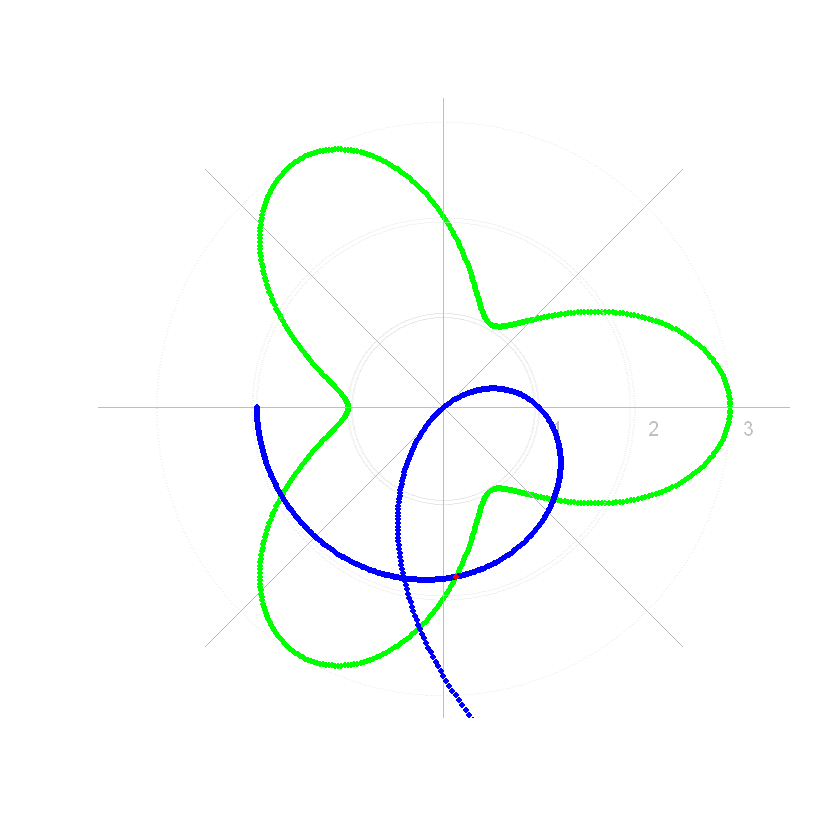

In [14]:
sol2 <- biseccion(-pi/2,0)
cat("La solución por el método de bisección es: ",sol2," i= ", iteraciones, "\nCon error de E= ",E)

plot.new()
plot.window(xlim = c(-3, 3), ylim = c(-3, 3), asp = 1)

dim <- seq(-pi, pi, by=pi/300) 
r=2+cos(3*dim)
polar(dim,r,"green")

r=2-exp(dim)
polar(dim,r,"blue")

graficarPuntoPolar(sol2)

Conclusion: Tal y como se esperaba el metodo de Newton Raphson ofrece una mayor precision en un menor numero de iteraciones con respecto al metodo de biseccion. No obstante, para esta funcion periodica se presenta el inconveniente de que encontrar una sola solucion requiere que el valor inicial de x sea bastante cercano a la solucion real, de lo contrario no se obtiene el valor deseado.

## Epsilon de una Máquina

### 1. ¿Cómo se ajusta un número binario infinito en número finito de bits?

Para ajustar un número binario infinito, se utiliza el método de truncamiento o el método de redondeo para representar el valor en un número finito de bits. Mediante estas técnicas se pretende representar un valor infinito en una aproximación finita de bits.

### 2. ¿Cúal es la diferencia entre redondeo y recorte?

En el metodo de truncamiento se eliminan los bits que van después de una posición determinada. Mientras que en el método de redondeo, se aproxima hacia arriba o hacia abajo el bit en una posición determinada en función del bit siguiente. Es decir si el último bit eliminado es 1 entonces se aproxima hacia arriba, en caso contrario se aproxima hacia abajo. 

### 3. Indique el número de punto flotante (IEEE) de precisión doble asociado a *x* para _x(0.4)_

#### Paso 1: Pasar parte entera y decimal a binario

$$ (0)_{10} = 0_b $$
$$ (.4)_{10} = (1100110011001100...)_b $$

#### Paso 2: Determinar mantisa, signo y característica

El resultado del paso anterior se expresa en notación científica.

$$ 0,1100110011001100... = (1,100110011001100..)_b \; x \; 10^{-1} $$

En este caso el exponente es -1, por lo tanto la característica es -1 + 1023 = 1022:

$$ Característica = (1022)_{10} = 1111111110_b $$

La mantisa corresponde a los 52 primeros digitos después de la ',' dado que hay infinitos digitos se emplea el método de redondeo de *inserte aqui método* obteniendo:

$$ Mantisa = 10011001100110011001100110011001100110011001100110\textbf{10} $$
Como se observa en el texto en negrilla los últimos digitos fueron redondeados hacia arriba.

Finalmente el bit de signo es 0 dado que el valor es positivo.

#### Paso 3: Convertir resultado a decimal

El número 0.4 en el estándar 754-IEEE corresponde a:
$$ fl(0.4) = 0\;1111111110\;1001100110011001100110011001100110011001100110011010_b $$

En base decimal corresponde a:

$$ fl(0.4) = 0.40000000000000002220446049250313080847263336181640625_{10} $$

 
## Punto 5  Encuentre el error de redondeo para x = 0.4 de acuerdo a lo anterior

El error relativo corresponde a :
$$ e = \frac{|fl(0.4) - 0.4|}{|0.4|} = 5.551115\;x\;10^{-17} $$

El cual es menor que la mitad del error de maquina: 
$$ e_{maq} = \frac{1}{2}2^{-52} = 1.110223\;x\;10^{-16} $$

## Punto 6

### Ejercicio 13: Encuentre una fórmula iterativa de convergencia cuadrática

El algoritmo babilónico es un método iterativo para encontrar la raíz de un numéro real con una convergencia cuadrática. Parte del hecho de que la longitud de cada lado de un cuadrado corresponde a la raíz del área del cuadrado. Encontrar la raíz n-ésima consiste en:

    x: Valor inicial 
    a: Valor anterior
    r: Aproximación de raíz
    n: numero de iteraciones 
    
        r <- x
        a <- 0
        Mientras n > 0 hacer
            a <- r
            r <- 1/2*( x/r + r )
            n <- n-1
        
        Mostrar r
        
El intervalo de convergencia del algoritmo babilonico son todos los números reales positivos.
    
### Ejercicio 14: Método intuitivo para calcular raíz

#### a) De manera formal escriba las condiciones necesarias para que la raíz exista, sea única y pueda ser calculada.  

Para que la raíz exista en una función f(x) dentro de un intervalo cerrado [a,b] se deben cumplir las siguientes condiciones:
- f(a)*f(b) > 0
- f(x) debe ser continua y derivable en el intervalo 
- El teorema de Rolle especifica que para que exista mas de una solucion en un intervalo [a,b] deben existir c y d que pertenecen al intervalo [a,b] con c distinto de d, tal que f(c)=f(d)=0. Es decir, que en el intervalo [a,b] existe al menos 1 punto en donde f'(k) = 0. 
    Por lo tanto para que la solucion sea unica se debe aplicar reduccion al absurdo del teorema de Rolle, es decir, demostrar que la funcion f(x) no tiene un punto k en el intervalo [a,b] que cumpla f'(k) = 0. 

#### b) Factor de convergencia

Como se puede observar en el punto c el error de este metodo disminuye lentamente, puesto que permanece con el mismo error durante varias iteraciones. Por lo tanto se afirma que el orden de convergencia del metodo es lineal con un factor de convergencia inferior a 1.

#### c) Describa el procedimiento anterio en tnotación algorítmica, o en MATLAB o en Python

In [2]:
MAX_ITERACIONES = 1000
def f(x):
  return x-5

def metodoIntuitivo(a,b,e):
    E = e
    x = a
    d = (b-a)/10
    i = 0

    if f(a)*f(b) > 0:
      return None

    while abs(d) > E and i < MAX_ITERACIONES:
        x+=d

        if f(x-d)*f(x) < 0:
            d = -1*(d/10)
        i += 1
        print("i = " + str(i) + "  x = " + str(x) + "  E=" + str(d) )

    return (x)

temp = 10
e = 1e-6
a = 0
b = 15

resultado = metodoIntuitivo(a,b,e)
if(resultado == None):
    print("No existe solucion en el intervalo")
else:
    print("La solucion es: ", resultado)

i = 1  x = 1.5  E=1.5
i = 2  x = 3.0  E=1.5
i = 3  x = 4.5  E=1.5
i = 4  x = 6.0  E=-0.15
i = 5  x = 5.85  E=-0.15
i = 6  x = 5.699999999999999  E=-0.15
i = 7  x = 5.549999999999999  E=-0.15
i = 8  x = 5.399999999999999  E=-0.15
i = 9  x = 5.249999999999998  E=-0.15
i = 10  x = 5.099999999999998  E=-0.15
i = 11  x = 4.9499999999999975  E=0.015
i = 12  x = 4.964999999999997  E=0.015
i = 13  x = 4.979999999999997  E=0.015
i = 14  x = 4.9949999999999966  E=0.015
i = 15  x = 5.009999999999996  E=-0.0015
i = 16  x = 5.008499999999996  E=-0.0015
i = 17  x = 5.006999999999996  E=-0.0015
i = 18  x = 5.005499999999996  E=-0.0015
i = 19  x = 5.003999999999996  E=-0.0015
i = 20  x = 5.002499999999996  E=-0.0015
i = 21  x = 5.000999999999996  E=-0.0015
i = 22  x = 4.999499999999996  E=0.00015000000000000001
i = 23  x = 4.9996499999999955  E=0.00015000000000000001
i = 24  x = 4.999799999999995  E=0.00015000000000000001
i = 25  x = 4.999949999999995  E=0.00015000000000000001
i = 26  x = 5.0000999999